In [2]:
#Importando algumas bibliotecas básicas

import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import category_encoders as cd 


In [3]:
#Lendo o Arquivo a ser Analisado
dados = pd.read_csv("powerconsumption.csv")
display(dados)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [4]:
#Averiguando algumas coisas dos dados 
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [5]:
#Vendo se tem valores nulos
dados.isnull().sum()

#Very good nice, não tem NA

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [6]:
dados.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

<Axes: xlabel='Temperature'>

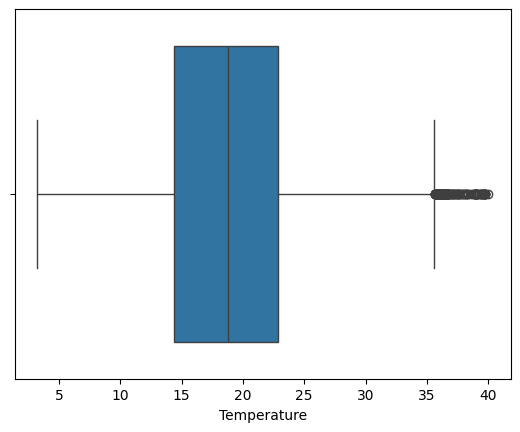

In [54]:
sbn.boxplot(data=dados, x = "Temperature")




<Axes: xlabel='Humidity'>

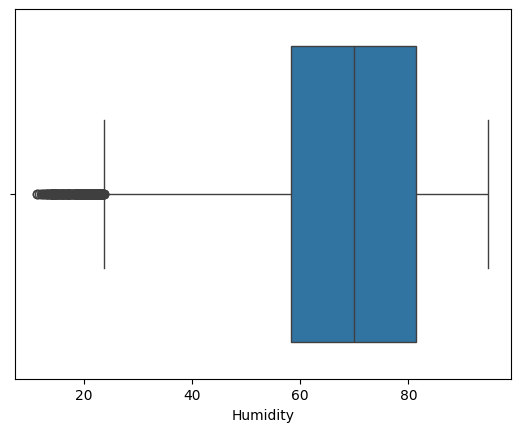

In [53]:
sbn.boxplot(data=dados, x = 'Humidity')


<Axes: xlabel='WindSpeed'>

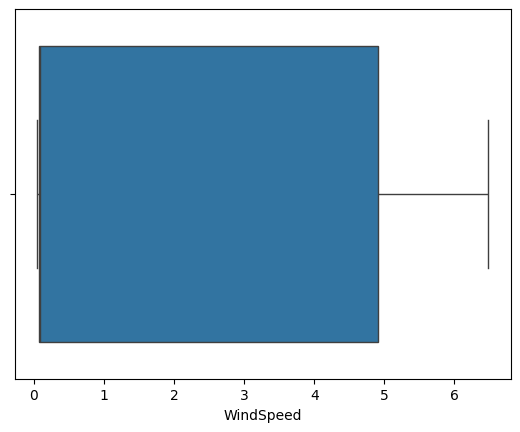

In [55]:
sbn.boxplot(data=dados, x = 'WindSpeed')

<Axes: xlabel='GeneralDiffuseFlows'>

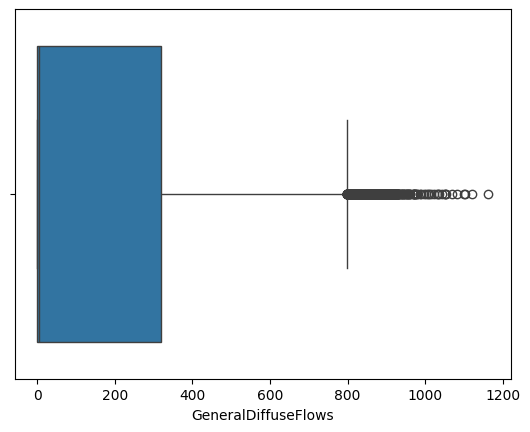

In [56]:
sbn.boxplot(data=dados, x = 'GeneralDiffuseFlows')

<Axes: xlabel='DiffuseFlows'>

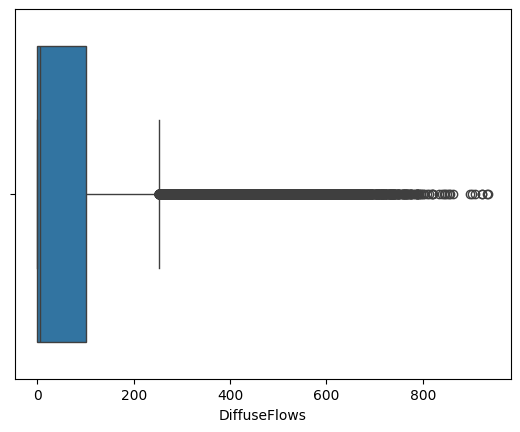

In [57]:
sbn.boxplot(data=dados, x = 'DiffuseFlows')

<Axes: xlabel='PowerConsumption_Zone1'>

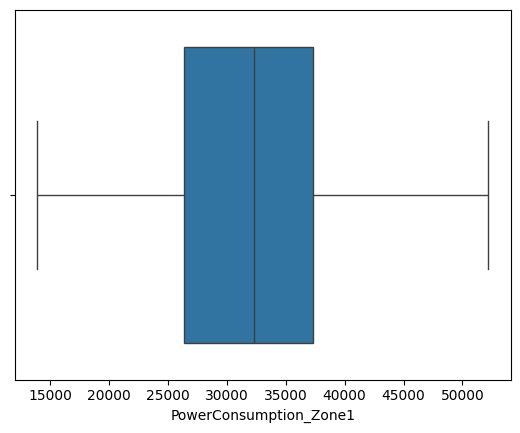

In [58]:
sbn.boxplot(data=dados, x = 'PowerConsumption_Zone1')

<Axes: xlabel='PowerConsumption_Zone2'>

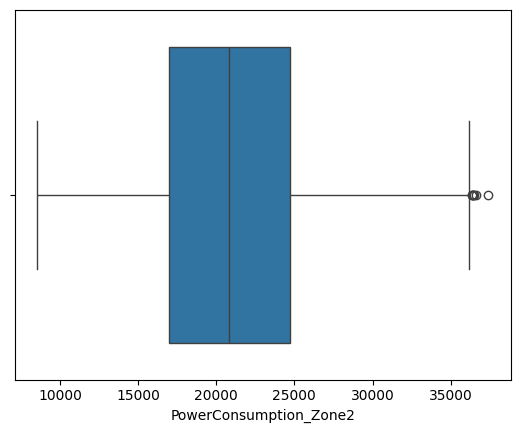

In [59]:
sbn.boxplot(data=dados, x = 'PowerConsumption_Zone2')

<Axes: xlabel='PowerConsumption_Zone3'>

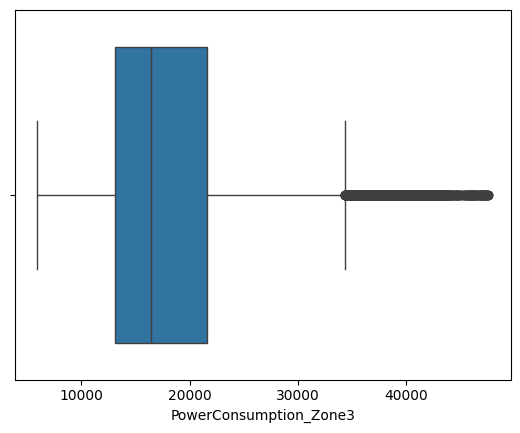

In [60]:
sbn.boxplot(data=dados, x = "PowerConsumption_Zone3")


In [8]:
colunas = ['Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3']

for coluna in colunas:
    print(coluna, dados[coluna].describe())

Temperature count    52416.000000
mean        18.810024
std          5.815476
min          3.247000
25%         14.410000
50%         18.780000
75%         22.890000
max         40.010000
Name: Temperature, dtype: float64
Humidity count    52416.000000
mean        68.259518
std         15.551177
min         11.340000
25%         58.310000
50%         69.860000
75%         81.400000
max         94.800000
Name: Humidity, dtype: float64
WindSpeed count    52416.000000
mean         1.959489
std          2.348862
min          0.050000
25%          0.078000
50%          0.086000
75%          4.915000
max          6.483000
Name: WindSpeed, dtype: float64
GeneralDiffuseFlows count    52416.000000
mean       182.696614
std        264.400960
min          0.004000
25%          0.062000
50%          5.035500
75%        319.600000
max       1163.000000
Name: GeneralDiffuseFlows, dtype: float64
DiffuseFlows count    52416.000000
mean        75.028022
std        124.210949
min          0.011000
25%  

In [9]:
#Fazendo uma limpesa de outliers dos dados
#Usando o método de quartil

def detecta_outlier(dados, coluna):
    Q1 = dados[coluna].quantile(0.25)
    Q3 = dados[coluna].quantile(0.75)
    IQR = Q3-Q1

    quartil_abaixo = Q1 - 1.5 * IQR
    quartil_acima = Q1 + 1.5 * IQR

    lista = dados.index[(dados[coluna]< quartil_abaixo) | (dados[coluna] > quartil_acima)]

    return(lista)

index_lista = []

for coluna in dados.columns.drop("Datetime"):
    index_lista.extend(detecta_outlier(dados, coluna))

index_lista

[17492,
 17493,
 17494,
 17495,
 17496,
 17497,
 17498,
 17499,
 17500,
 17501,
 17502,
 17503,
 17504,
 17505,
 17506,
 17507,
 17508,
 17509,
 17510,
 17511,
 17512,
 17513,
 17514,
 17515,
 17516,
 17517,
 17518,
 17519,
 17520,
 17521,
 17522,
 17523,
 17524,
 17525,
 17526,
 17527,
 17528,
 17529,
 17530,
 17531,
 17532,
 17533,
 17534,
 17535,
 17536,
 17645,
 17646,
 17647,
 17648,
 17649,
 17650,
 17651,
 17652,
 17653,
 17654,
 17655,
 17656,
 17657,
 19078,
 19079,
 19080,
 19081,
 19082,
 19083,
 19084,
 19085,
 19086,
 19087,
 19088,
 19089,
 19090,
 19091,
 19092,
 19093,
 19094,
 19095,
 19096,
 19097,
 19098,
 19099,
 19100,
 19101,
 19102,
 19103,
 19104,
 19105,
 19106,
 19107,
 19108,
 19109,
 19110,
 19111,
 19112,
 19113,
 19114,
 19115,
 19116,
 19117,
 19118,
 19119,
 19120,
 19121,
 19122,
 19123,
 19124,
 19125,
 19126,
 19127,
 19128,
 19129,
 19130,
 19131,
 19132,
 19231,
 19232,
 19233,
 19234,
 19235,
 19236,
 19237,
 19238,
 19239,
 19807,
 19808,
 19809,


In [10]:
#Removendo agora os trocentos outliers
def remove_outlier(dados, lista):
    lista = sorted(set(lista))
    dados = dados.drop(lista)
    return (dados)

dados_sem_outliers = remove_outlier(dados, index_lista)

dados_sem_outliers.shape

(28377, 9)

In [11]:
display(dados_sem_outliers)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [12]:
#Observando a correlação com o consumo de energia
dados.drop(columns="Datetime").corr()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Temperature,1.000000,-0.460243,0.477109,0.460294,0.196522,0.440221,0.382428,0.489527
Humidity,-0.460243,1.000000,-0.135853,-0.468138,-0.256886,-0.287421,-0.294961,-0.233022
WindSpeed,0.477109,-0.135853,1.000000,0.133733,-0.000972,0.167444,0.146413,0.278641
GeneralDiffuseFlows,0.460294,-0.468138,0.133733,1.000000,0.564718,0.187965,0.157223,0.063376
DiffuseFlows,0.196522,-0.256886,-0.000972,0.564718,1.000000,0.080274,0.044667,-0.038506
PowerConsumption_Zone1,0.440221,-0.287421,0.167444,0.187965,0.080274,1.000000,0.834519,0.750733
PowerConsumption_Zone2,0.382428,-0.294961,0.146413,0.157223,0.044667,0.834519,1.000000,0.570932
PowerConsumption_Zone3,0.489527,-0.233022,0.278641,0.063376,-0.038506,0.750733,0.570932,1.000000


In [13]:
dados.drop_duplicates()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [85]:
#O conjunto de dados não tem NAs e os outliers foram removidos, além disso não existem variáveis catégoricas
#O encoding por justamente não existirem variáveis categóricas
#Vamos agora separar um teste do machine learning com os outliers e sem os outliers

#Agora vamos fazer o spliting

from sklearn.model_selection import train_test_split

X = dados.drop(columns=["Datetime", "Humidity", "DiffuseFlows", "PowerConsumption_Zone1"])
y = dados["PowerConsumption_Zone1"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(41932, 5) (10484, 5) (41932,) (10484,)


In [86]:
#Fazendo o scaling dos dados

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

print(X_train_scaled.std())
print(X_test_scaled.std())

1.0
1.0


In [87]:
#Treinando
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
y_pred

reg.score(X_test_scaled, y_test)

0.8138679237641936

In [88]:
#Avaliando o teste

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

print(f'MAE:  {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test, y_pred)}')
print(f'MAPE: {np.mean(np.abs((y_test - y_pred) / y_test)) * 100}')
print(f'R²: {r2_score(y_test,y_pred)}')


MAE:  2490.707661163565
MSE: 9505593.03998325
RMSE: 3083.1141788755167
MAPE: 7.708925318726114
R²: 0.8138679237641936


<Axes: ylabel='Density'>

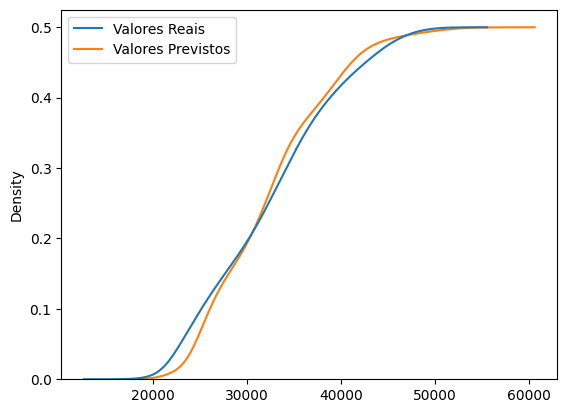

In [89]:
#Valores reais vs Valores do ML

valores = pd.DataFrame({
    "Valores Reais": y_test,
    "Valores Previstos": y_pred
})

sbn.kdeplot(data = valores, cumulative=True)


In [92]:
#Teste sem outlier
X = dados_sem_outliers.drop(columns=["Datetime", "Humidity", "DiffuseFlows", "PowerConsumption_Zone1"])
y = dados_sem_outliers["PowerConsumption_Zone1"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22701, 5) (5676, 5) (22701,) (5676,)


In [93]:

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

print(X_train_scaled.std())
print(X_test_scaled.std())

1.0
1.0


In [94]:
#Treinando teste sem outlier
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
y_pred

reg.score(X_test_scaled, y_test)

0.8257929676279246

In [95]:
#Avaliando o teste sem outlier

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

print(f'MAE:  {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test, y_pred)}')
print(f'MAPE: {np.mean(np.abs((y_test - y_pred) / y_test)) * 100}')
print(f'R²: {r2_score(y_test,y_pred)}')

MAE:  1849.466170444619
MSE: 5691750.869073994
RMSE: 2385.7390613966973
MAPE: 6.569085735560519
R²: 0.8257929676279246


<Axes: ylabel='Density'>

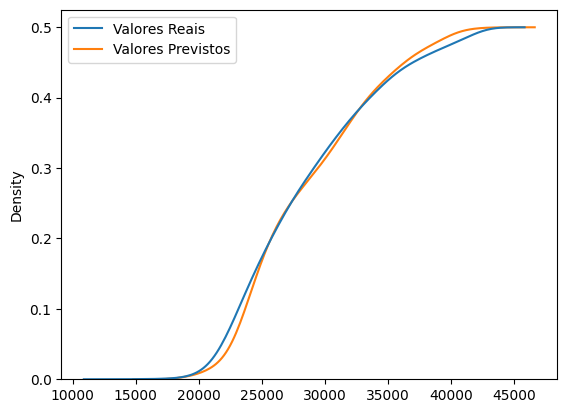

In [96]:
#Valores reais vs Valores do ML

valores = pd.DataFrame({
    "Valores Reais": y_test,
    "Valores Previstos": y_pred
})

sbn.kdeplot(data = valores, cumulative=True)